In [224]:
import tensorflow as tf
from tensorflow import keras

In [225]:
fashon_mnist = keras.datasets.fashion_mnist

In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [227]:
(X_train_full,y_train_full),(X_test,y_test) = fashon_mnist.load_data()

Let's create a validation set, because we don't have one. 

In [229]:
X_val, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0

In [252]:
X_val.shape

(5000, 28, 28)

In [254]:
X_train[0] # Values are between 0-1, Sampled.

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17254902, 0.49803922, 0.71372549, 0.7254902 ,
        0.63137255, 0.47058824, 0.21568627, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16470588,
        0.77647059, 0.98431373, 1.        , 0.98431373, 0.97647059,
        0.96862745, 1.    

In [256]:
y_val, y_train = y_train_full[:5000], y_train_full[5000:]

Because we don't have readible labels, we need to create the categories for them. 

In [259]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"] # From the internet for the fashon_MNIST dataset.

In [261]:
y_train[0]

4

In [263]:
X_train.shape

(55000, 28, 28)

In [265]:
class_names[y_train[0]]

'Coat'

In [317]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [269]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 300)               235500    
                                                                 
 dense_16 (Dense)            (None, 100)               30100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [271]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [273]:
model.layers

In [275]:
hidden1 = model.layers[1]

In [277]:
weights, biasses = hidden1.get_weights()

In [279]:
weights

array([[-0.03768861, -0.02450339, -0.06613491, ...,  0.04800789,
        -0.03779897,  0.07180062],
       [ 0.05875042,  0.06646216,  0.02487017, ..., -0.03006002,
        -0.02564512,  0.06069484],
       [-0.05576858, -0.00621183,  0.03450377, ..., -0.05684863,
         0.00370326,  0.04805284],
       ...,
       [ 0.07289053,  0.06091367,  0.02497802, ..., -0.0231274 ,
         0.05835119, -0.0037967 ],
       [ 0.06316741, -0.02225299,  0.05763339, ...,  0.01807719,
         0.03957863, -0.06316184],
       [-0.0508871 , -0.00015127, -0.04783865, ...,  0.03926783,
        -0.03457909, -0.04515664]], dtype=float32)

In [281]:
weights.shape

(784, 300)

In [283]:
biasses

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [285]:
biasses.shape

(300,)

In [319]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer= 'adam', metrics=['accuracy'])

In [321]:
history = model.fit(x= X_train, y = y_train, epochs= 40, validation_data= (X_val, y_val))

Epoch 1/40
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4880 - accuracy: 0.8238 - val_loss: 0.3808 - val_accuracy: 0.8590
Epoch 2/40
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3639 - accuracy: 0.8652 - val_loss: 0.3615 - val_accuracy: 0.8690
Epoch 3/40
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3266 - accuracy: 0.8787 - val_loss: 0.3494 - val_accuracy: 0.8732
Epoch 4/40
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3025 - accuracy: 0.8884 - val_loss: 0.3106 - val_accuracy: 0.8860
Epoch 5/40
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2856 - accuracy: 0.8930 - val_loss: 0.3170 - val_accuracy: 0.8840
Epoch 6/40
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2699 - accuracy: 0.8985 - val_loss: 0.3157 - val_accuracy: 0.8878
Epoch 7/40
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2584 - accuracy: 0.9021 - val_loss: 0.3108 - val_accuracy:

(0.0, 25.0)

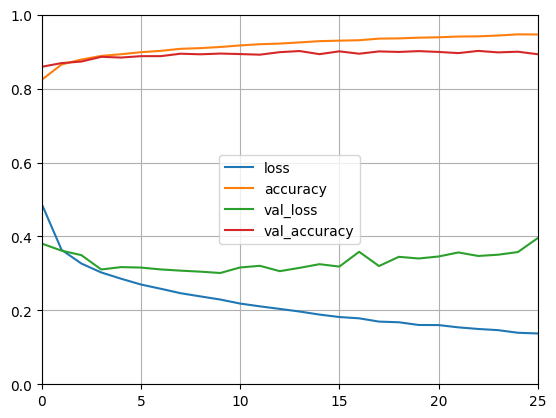

In [323]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.gca().set_xlim(0,25)

In [325]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 110.3249 - accuracy: 0.8731


[110.3248519897461, 0.8730999827384949]

In [342]:
X_new = X_test[:3]
model.predict(X_new)

1/1 [==============================] - 0s 93ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)